# Predicting Bean Type Using Predictors:


# Introduction:
For our group project, we will be using the UC Irvine dry bean database with predictors such as area, perimeter, major axis length, minor axis length, aspect ratio, as well as other factors. With this information, we can answer the question: What is the type of bean given data about the predictors?  The UC Irvine dry bean dataset contains 6 different classes for beans, and with the predictors given we attempt to accurately classify the bean with its correct class. This would allow for easier and more convenient classification for beans, which can be a tedious task if done manually.

Here are the variables in this dataset:

*Area-The area of a bean zone and the number of pixels within its boundaries.

*Perimeter-Bean circumference is defined as the length of its border.

*MajorAxisLength-The distance between the ends of the longest line that can be drawn from a bean.

*MinorAxisLength-The longest line that can be drawn from the bean while standing perpendicular to the main axis.

*AspectRatio-Defines the relationship between MajorAxisLength and MinorAxisLength.

*Eccentricity-Eccentricity of the ellipse having the same moments as the region.

*ConvexArea-Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

*EquivDiameter-Equivalent diameter: The diameter of a circle having the same area as a bean seed area.

*Extent-The ratio of the pixels in the bounding box to the bean area.

*Solidity-Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

*Roundness-Calculated with the following formula: (4piA)/(P^2).

*Compactness-Measures the roundness of an object.


# Preliminary Exploratory Data Analysis:

To begin this project, we first loaded in the necessary libraries needed for our data analysis. This set also includes loading in the data file, from our github page into Jupyter seen in the second cell below.

In [2]:
library(tidyverse)
library(tidymodels)
#library(dbplyr)
library(purrr)
library(readxl)
library(RCurl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
url <- "https://raw.githubusercontent.com/Ericckiim/DSCI-Group-Project/main/Dry_Bean_Dataset.csv?token=GHSAT0AAAAAACLEA7BQSJCR7WK5W7DN5PFMZLRJMEA"
bean_data_unscaled <- read_csv(url)
# Needs to be loaded in from original source on web
glimpse(bean_data_unscaled)

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (16): Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 13,611
Columns: 17
$ Area            <dbl> 28395, 28734, 29380, 30008, 30140, 30279, 30477, 30519…
$ Perimeter       <dbl> 610.291, 638.018, 624.110, 645.884, 620.134, 634.927, …
$ MajorAxisLength <dbl> 208.1781, 200.5248, 212.8261, 210.5580, 201.8479, 212.…
$ MinorAxisLength <dbl> 173.8887, 182.7344, 175.9311, 182.5165, 190.2793, 181.…
$ AspectRation    <dbl> 1.197191, 1.097356, 1.209713, 1.153638, 1.060798, 1.17…
$ Eccentricity    <dbl> 0.5498122, 0.4117853, 0.5627273, 0.4986160, 0.3336797,…
$ ConvexArea      <dbl> 28715, 29172, 29690, 30724, 30417, 30600, 30970, 30847…
$ EquivDiameter   <dbl> 190.1411, 191.2728, 193.4109, 195.4671, 195.8965, 196.…
$ Extent          <dbl> 0.7639225, 0.7839681, 0.7781132, 0.7826813, 0.7730980,…
$ Solidity        <dbl> 0.9888560, 0.9849856, 0.9895588, 0.9766957, 0.9908932,…
$ roundness       <dbl> 0.9580271, 0.8870336, 0.9478495, 0.9039364, 0.9848771,…
$ Compactness     <dbl> 0.9133578, 0.9538608, 0.9087742, 0.9283288, 0.9705155,…
$ ShapeFactor1 

The above cell shows a glimpse of the data used in this classification analysis with 16 total columns related to the specific values associated with each bean and the final column being the class of bean denoted as seven types seen below.

In [4]:
bean_class<-
bean_data_unscaled|>distinct(Class)
bean_class

Class
<chr>
SEKER
BARBUNYA
BOMBAY
CALI
HOROZ
SIRA
DERMASON


In [5]:
bean_data_unscaled<- bean_data_unscaled|>
    mutate(Class = as_factor(Class))


The above cell converts the Class variables from a character type variable into a factor making it possible to use in the classification model.

In [6]:
set.seed(1)
sample_size <- round(0.1 * nrow(bean_data_unscaled))
random_sample <- bean_data_unscaled[sample(nrow(bean_data_unscaled), sample_size), ]
glimpse(random_sample)

Rows: 1,361
Columns: 17
$ Area            <dbl> 39192, 41191, 75990, 25765, 38374, 49946, 35742, 26707…
$ Perimeter       <dbl> 709.658, 776.063, 1047.960, 593.281, 742.778, 836.653,…
$ MajorAxisLength <dbl> 242.1603, 282.0423, 409.9497, 220.5953, 272.2549, 309.…
$ MinorAxisLength <dbl> 206.3863, 186.4416, 237.5924, 149.0794, 180.2853, 205.…
$ AspectRation    <dbl> 1.173336, 1.512765, 1.725432, 1.479717, 1.510134, 1.50…
$ Eccentricity    <dbl> 0.5231003, 0.7503496, 0.8149261, 0.7370804, 0.7493335,…
$ ConvexArea      <dbl> 39464, 41770, 76906, 26038, 38852, 50482, 36323, 26985…
$ EquivDiameter   <dbl> 223.3849, 229.0109, 311.0522, 181.1216, 221.0414, 252.…
$ Extent          <dbl> 0.7829787, 0.7909178, 0.6974439, 0.7074992, 0.7164408,…
$ Solidity        <dbl> 0.9931076, 0.9861384, 0.9880894, 0.9895153, 0.9876969,…
$ roundness       <dbl> 0.9779330, 0.8594453, 0.8695146, 0.9198545, 0.8740351,…
$ Compactness     <dbl> 0.9224669, 0.8119737, 0.7587570, 0.8210580, 0.8118912,…
$ ShapeFactor1  

Due to the large size of the data, having had 13611 rows using 10% of these values is necessary in order to load run the classification model specification, specifically the K-value predictior which is shown later on. This 10% sample is randomly drawn from the dataset and is shown below, now with 1361 rows

The plot below is one of many visualizations between two of the variables in the dataset and  displays how the variables are seperated by class, this is all show in the cell following this which displays the percentage of each class.

In [8]:
bean_split <- initial_split(random_sample, prop = 0.75, strata = Class)  
bean_train <- training(bean_split)   
bean_test <- testing(bean_split)
glimpse(bean_train)

Rows: 1,019
Columns: 17
$ Area            <dbl> 64930, 80946, 74382, 156250, 74215, 90988, 103602, 786…
$ Perimeter       <dbl> 990.342, 1093.510, 1073.257, 1509.428, 1058.806, 1150.…
$ MajorAxisLength <dbl> 377.2082, 422.8378, 413.3196, 568.1211, 404.4510, 448.…
$ MinorAxisLength <dbl> 220.6749, 245.3977, 230.4794, 352.3572, 236.0697, 259.…
$ AspectRation    <dbl> 1.709339, 1.723072, 1.793304, 1.612344, 1.713270, 1.72…
$ Eccentricity    <dbl> 0.8110179, 0.8143608, 0.8300896, 0.7844319, 0.8119843,…
$ ConvexArea      <dbl> 65973, 81704, 75387, 157716, 75634, 91581, 104732, 803…
$ EquivDiameter   <dbl> 287.5264, 321.0353, 307.7436, 446.0310, 307.3979, 340.…
$ Extent          <dbl> 0.7452938, 0.6782805, 0.7911548, 0.7916202, 0.6716290,…
$ Solidity        <dbl> 0.9841905, 0.9907226, 0.9866688, 0.9907048, 0.9812386,…
$ roundness       <dbl> 0.8319263, 0.8506673, 0.8114659, 0.8617972, 0.8318955,…
$ Compactness     <dbl> 0.7622485, 0.7592398, 0.7445657, 0.7850985, 0.7600374,…
$ ShapeFactor1  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


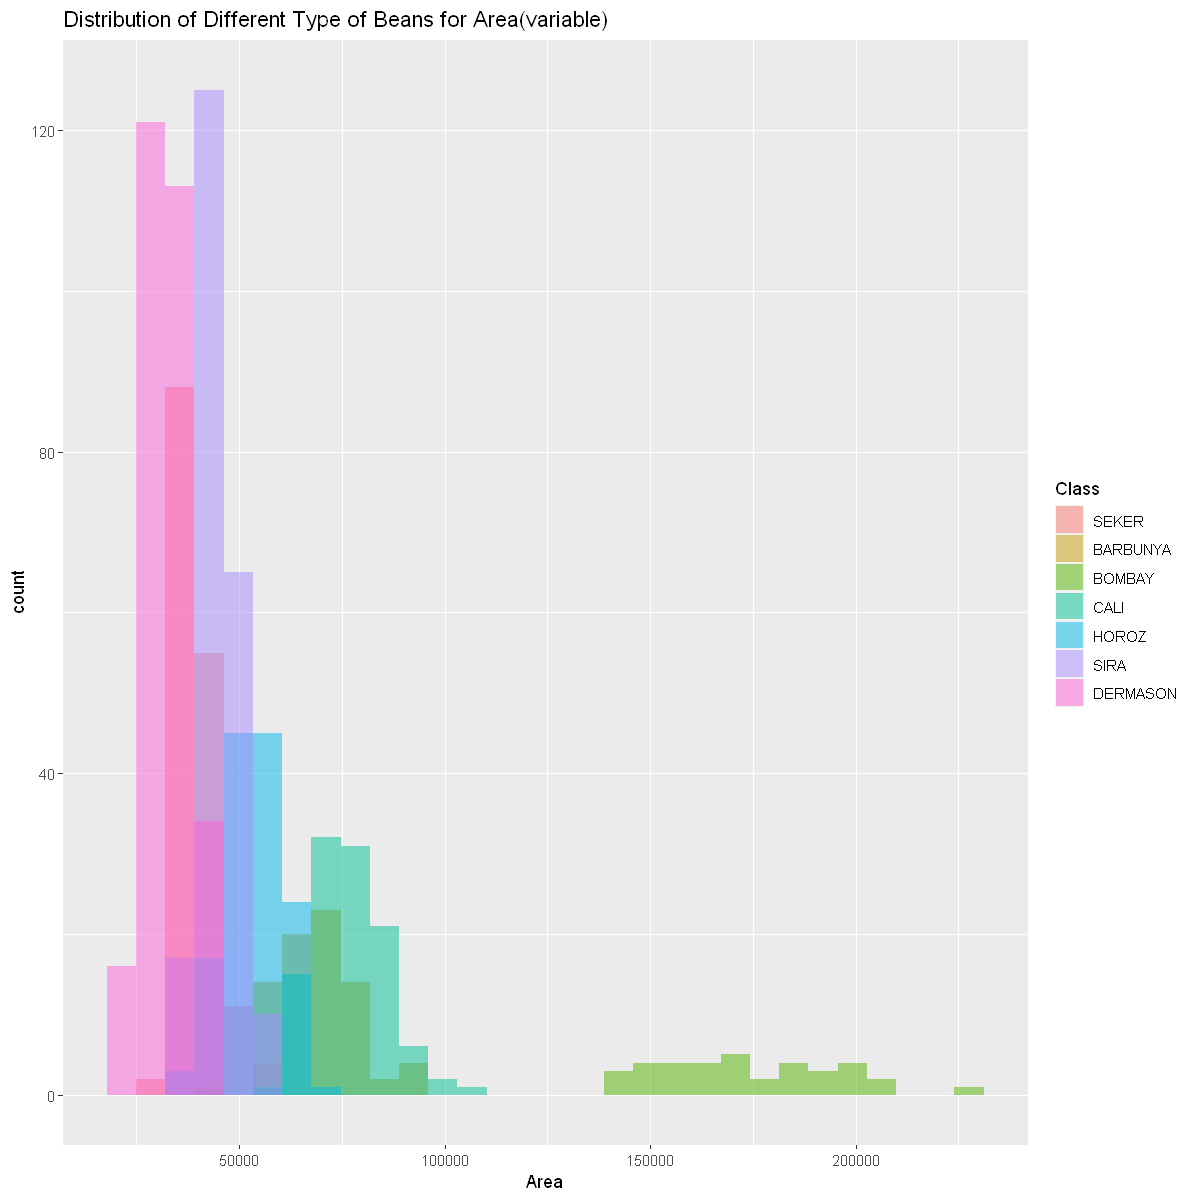

In [9]:
options(repr.plot.height = 10, repr.plot.width = 10)


predictor_distibution_plots<-
ggplot(bean_train, aes(x = Area , fill = Class)) +
  geom_histogram(alpha = 0.5, position = "identity")+
ggtitle("Distribution of Different Type of Beans for Area(variable)")



predictor_distibution_plots

In [10]:
num_obs<-nrow(bean_train)
num_type_train<-
bean_train|>
group_by(Class) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)
num_type_train

Class,count,percentage
<fct>,<int>,<dbl>
SEKER,160,15.701668
BARBUNYA,78,7.654563
BOMBAY,36,3.532875
CALI,109,10.696762
HOROZ,135,13.248283
SIRA,217,21.295388
DERMASON,284,27.870461


We then create the training and testing set with a 75% proportion and first analysis a model with k nearest neighbors set to 3. This helps to gauge what K accuracy the model may have. Because the models aim is to maximize the accuracy of this classification model, we use all explanatory variables from the dataset in the model.

To determine which of the predictors to use in order to maximize our classification model, we need to create a graph of the model accuracy estimates and the number of predictors seen below.

In [11]:
bean_subset <- random_sample |>
    select(Class, Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4)


In [12]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec1 <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
bean0_vfold <- vfold_cv(bean_subset, v = 5, strata = Class)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        bean_recipe <- recipe(as.formula(model_string), 
                                data = bean_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(bean_recipe) |>
          add_model(knn_spec1) |>
          tune_grid(resamples = bean0_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

ERROR: Error in names[[j]]: object of type 'builtin' is not subsettable


In [13]:
bean_recipe <- recipe(Class ~ Area + MinorAxisLength + AspectRation + ConvexArea + EquivDiameter + roundness + Compactness + ShapeFactor2, data = bean_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec) |>
  fit(data = bean_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09617272
Best kernel: rectangular
Best k: 3

In [15]:
bean_predictions <- predict(knn_fit, bean_test) |>
  bind_cols(bean_test)

bean_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8830409


Then we create 5 folds measuring the accuracy of each of the different K nearest neighbors. This is done from 2 to 100 so that the graph shows the entire range of possible K values.

In [144]:
bean_vfold <- vfold_cv(bean_train, v = 5, strata = Class)
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 2, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec2) |>
  tune_grid(resamples = bean_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.8891726,5,0.007128527,Preprocessor1_Model01
7,accuracy,multiclass,0.9077528,5,0.003909457,Preprocessor1_Model02
12,accuracy,multiclass,0.9126644,5,0.004990231,Preprocessor1_Model03
17,accuracy,multiclass,0.9107180,5,0.004105812,Preprocessor1_Model04
22,accuracy,multiclass,0.9097233,5,0.003934731,Preprocessor1_Model05
27,accuracy,multiclass,0.9107182,5,0.005147812,Preprocessor1_Model06
32,accuracy,multiclass,0.9038505,5,0.005834315,Preprocessor1_Model07
37,accuracy,multiclass,0.8989242,5,0.007355234,Preprocessor1_Model08
42,accuracy,multiclass,0.8969634,5,0.008329745,Preprocessor1_Model09


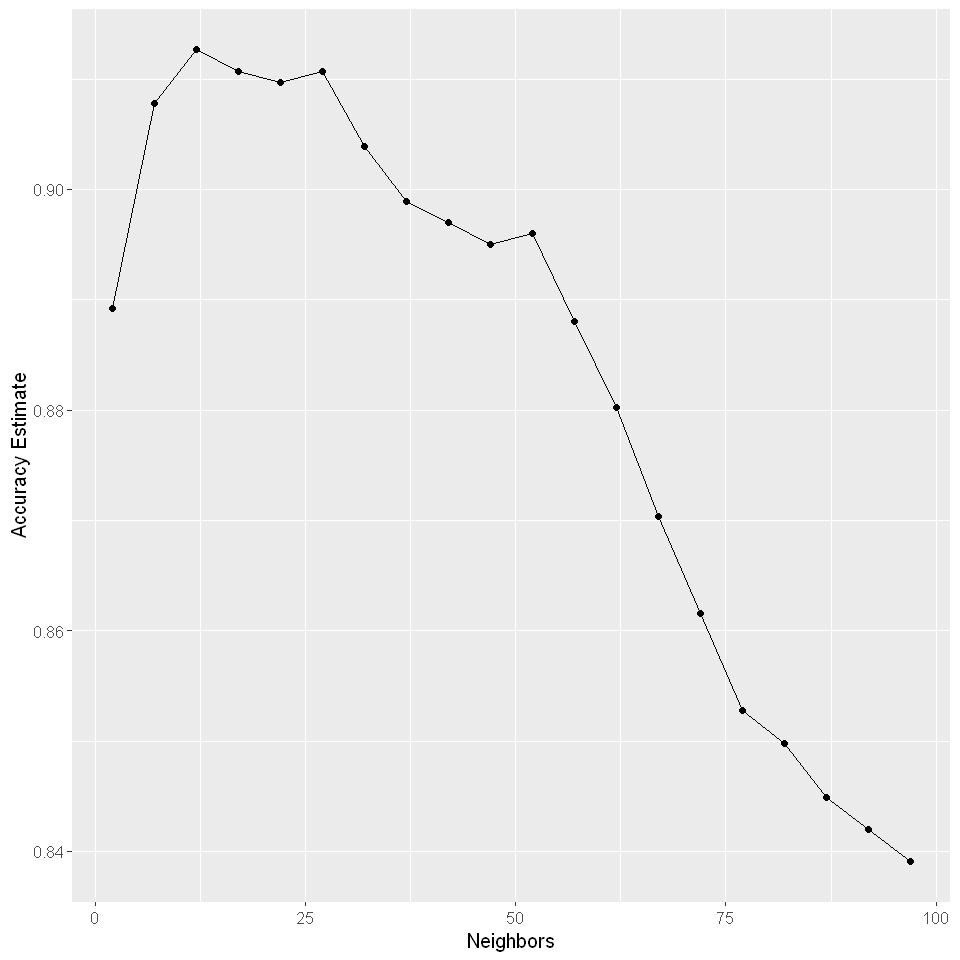

In [145]:
options(repr.plot.height = 8, repr.plot.width = 8)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k

From the above accuract plot, we see that the neighbors K that maximize accuracy is at K = 10 so remaking the model with this value seen below gives the 
best accuaracy of 0.8947368.

In [146]:
knn_spec3 <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit3 <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec3) |>
  fit(data = bean_train)

bean_predictions3 <- predict(knn_fit3, bean_test) |>
  bind_cols(bean_test)

bean_predictions3 |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8947368


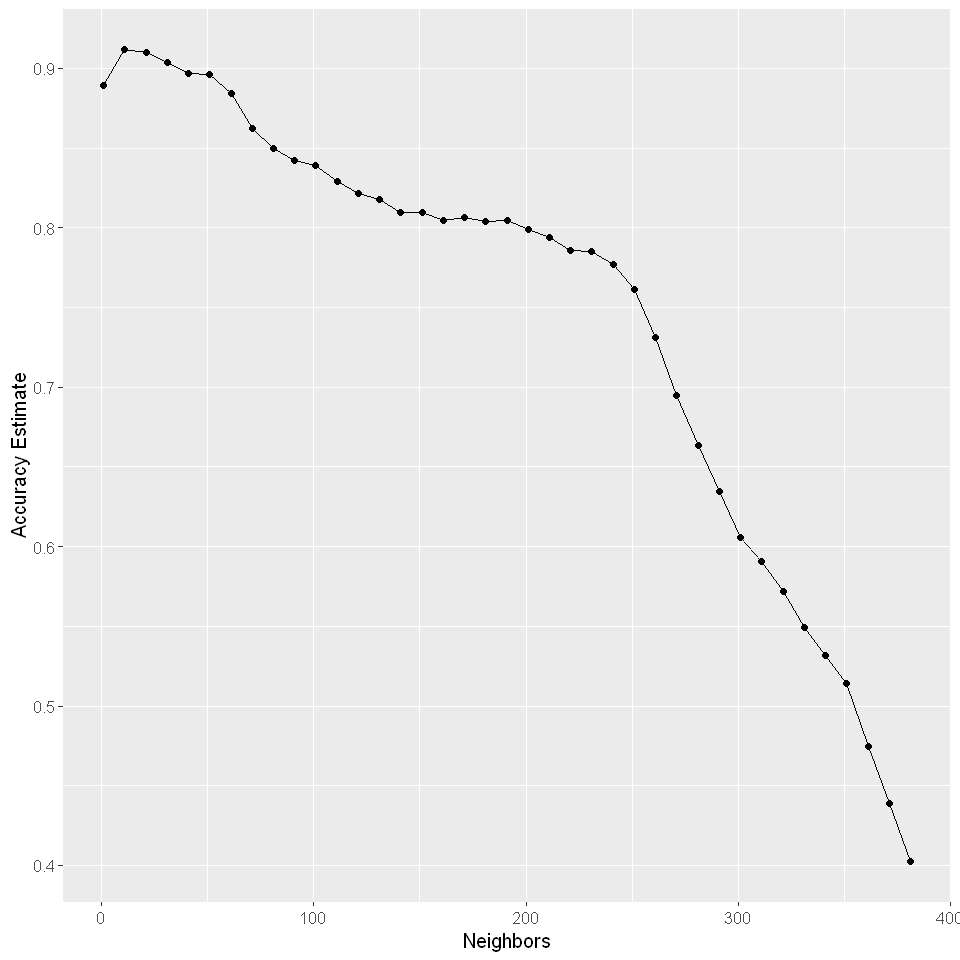

In [147]:
k_lots <- tibble(neighbors = seq(from = 1, to = 385, by = 10))

knn_results <- workflow() |>
  add_recipe(bean_recipe) |>
  add_model(knn_spec2) |>
  tune_grid(resamples = bean_vfold, grid = k_lots) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracy_vs_k_lots <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k_lots

# Method:
From the Dry Bean Dataset, our data analysis will consist of creating a classification model that predicts the Class or type of dry bean from a total of 12 dimensions and 4 shape forms. First, we will minimize the number of variables used in predicting the type of bean based on our predicitve question, importance to our model and cross-validation. After subsetting the data, we will evaluate the dataset by splitting it into two groups and using a training and testing set to maximize the accuracy of our predictions and performance of our model. Using the maximized accuracy K value found, we will then create a model that uses our specific variables to predict the type of bean in our dataset. This model will utilize multiple visuals to accuractely convey the fittings from our data including, a plot of estimated accuracy versus the number of neighbors, a plot of under or overfitting K neighbors and plots of the effects of irrelevant predictors.

# Expected Outcomes and Significance:
From the Dry Bean Dataset, our data analysis aims to develop a classification model for predicting the type of dry bean using 12 dimensions and 4 shape forms. To enhance the model's efficiency, we will initially reduce the number of variables, selecting those most relevant to our predictive question and emphasizing cross-validation. Subsequently, we will assess the dataset by dividing it into training and testing sets to optimize prediction accuracy and model performance. With the optimized K value, we will construct a model utilizing specific variables to predict bean types, supported by various visuals, such as accuracy versus neighbor count, under/overfitting plots, and assessments of irrelevant predictors.


Expected outcomes:
1. Improved accuracy in predicting dry bean types.
2. Identification of the most influential variables for classification.
3. Insights into the impact of neighbor count on model performance.
4. Assessment of the model's generalization capability.

Significance:

This analysis contributes to enhancing our understanding of dry bean classification and potentially improving bean type prediction accuracy, which can be valuable for various applications, such as agriculture and food processing.

Questions:
1. How does variable selection impact the model's accuracy?
2. What is the optimal number of neighbors for the highest accuracy?
3. How does overfitting or underfitting affect our model?
4. What are the key predictors for dry bean classification?
     